<img src="https://www.udd.cl/dircom/web/udd/Sello-35-color.png" alt="Logo UDD" width="184" height="269" style="float: left; margin-right: 10px;">
<img src="../imagenes/DMAClogo.png" alt="DMAC Logo" width="270" style="float: right; margin-left: 10px;">

<div style="text-align: center;">
    <h1><strong>5Y-week Stock Prices</strong></h1>
    <h3>Data Market Analysis Club - Universidad del Desarrollo</h3>
</div>

---
# Configuraciones iniciales

* Importación de librerías.
* Abrir el archivo `tickers.txt`
* Definición del rango de tiempo y el intervalo.

In [ ]:
# Descargar precios semanales (Open y Close) para los tickers listados en tickers.txt
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Instalar yfinance si no está disponible
try:
    import yfinance as yf
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'yfinance'])
    import yfinance as yf

# Leer tickers desde el archivo tickers.txt
tickers_path = Path('tickers.txt')
if not tickers_path.exists():
    raise FileNotFoundError(f'No se encontró {tickers_path.resolve()}')
with open(tickers_path, 'r', encoding='utf-8') as f:
    tickers = [line.strip() for line in f if line.strip()]

# Rango de 5 años hasta hoy, frecuencia semanal
period = '5y'
interval = '1wk'

# Descargar datos
data = yf.download(tickers, period=period, interval=interval)
print(type(data))
# Filtrar columnas de interés
data = data[['Open', 'Close']]


C:\Users\raalv\AppData\Local\Temp\ipykernel_19068\3991913697.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period, interval=interval)
[*********************100%***********************]  7 of 7 completed

<class 'pandas.core.frame.DataFrame'>


---
<div style="text-align: center;">
    <h2><strong>S&P IPSA</strong></h2>
    <h3>Ticker: ^IPSA</h3>
</div>

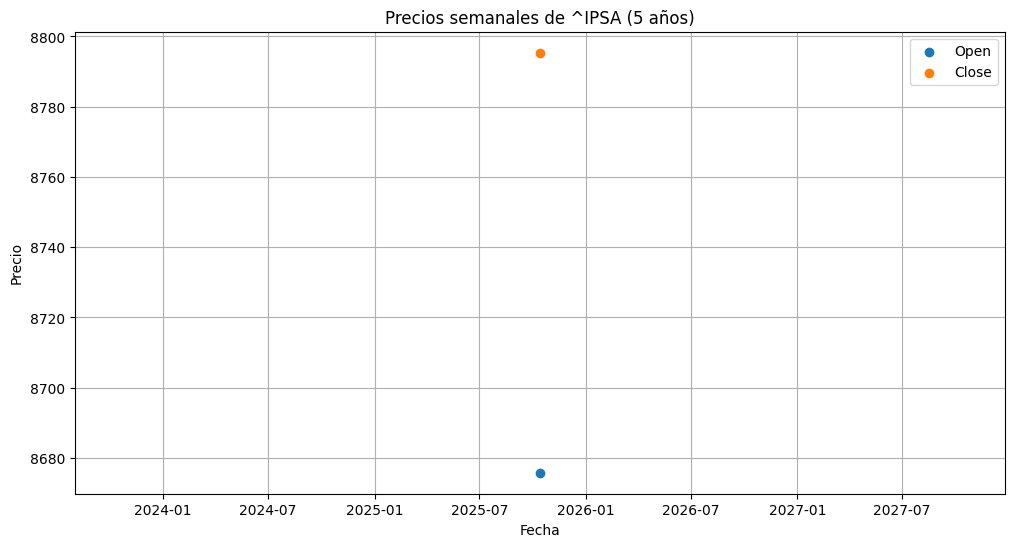

In [18]:
# Selecciona el ticker que quieres analizar
ticker = tickers[0]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.scatter(df_ticker.index, df_ticker['Open'], label='Open')
plt.scatter(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()


---
<div style="text-align: center;">
    <h2><strong>S&P500</strong></h2>
    <h3>Ticker: ^GSPC</h3>
</div>

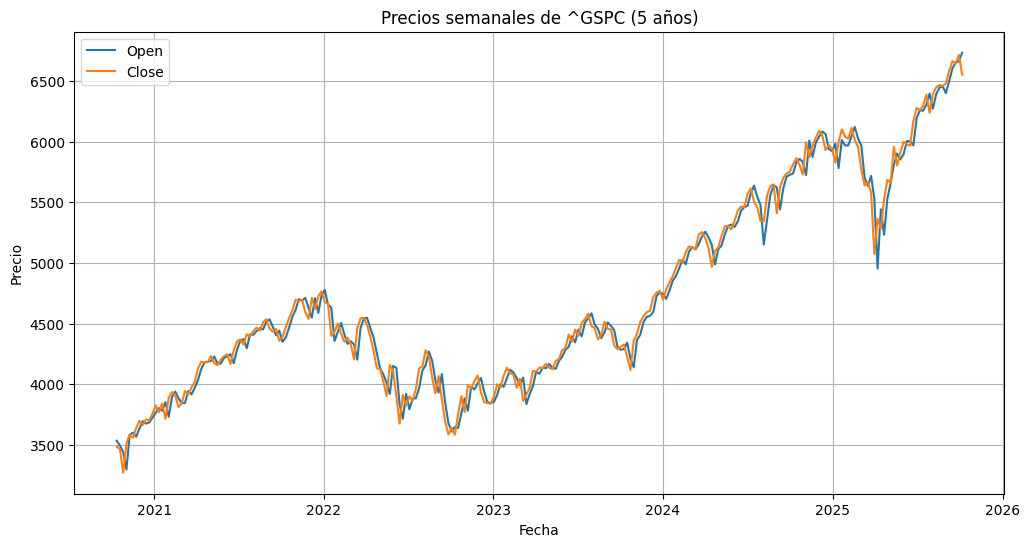

Variación semanal: -2.43%
Variación mensual: -0.48%
Variación anual  : 12.68%


In [14]:
# Selecciona el ticker que quieres analizar
ticker = tickers[1]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")

---
<div style="text-align: center;">
    <h2><strong>NVIDIA</strong></h2>
    <h3>Ticker: NVDA</h3>
</div>

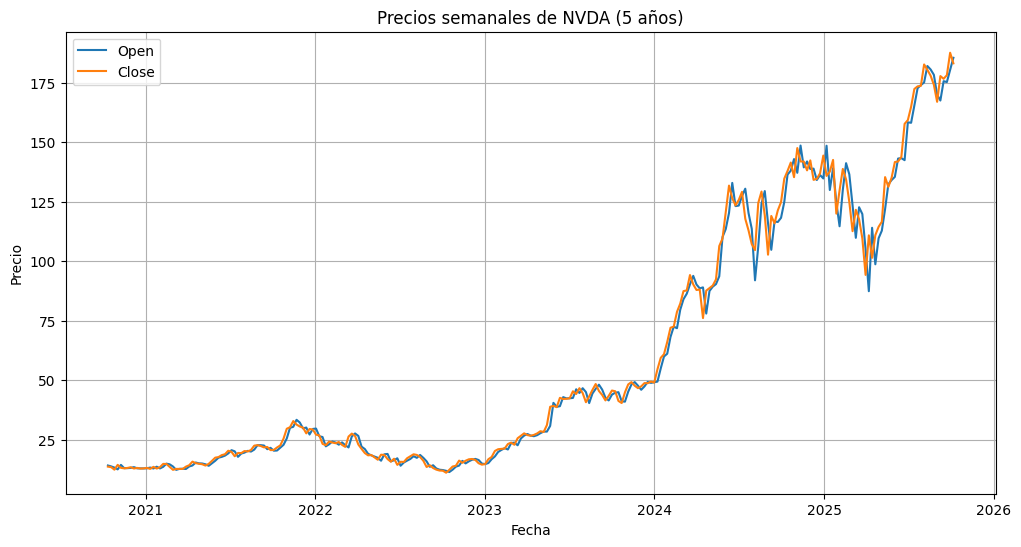

Variación semanal: -2.38%
Variación mensual: 3.01%
Variación anual  : 35.91%


In [19]:
# Selecciona el ticker que quieres analizar
ticker = tickers[2]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")

---
<div style="text-align: center;">
    <h2><strong>LATAM</strong></h2>
    <h3>Ticker: LTM</h3>
</div>

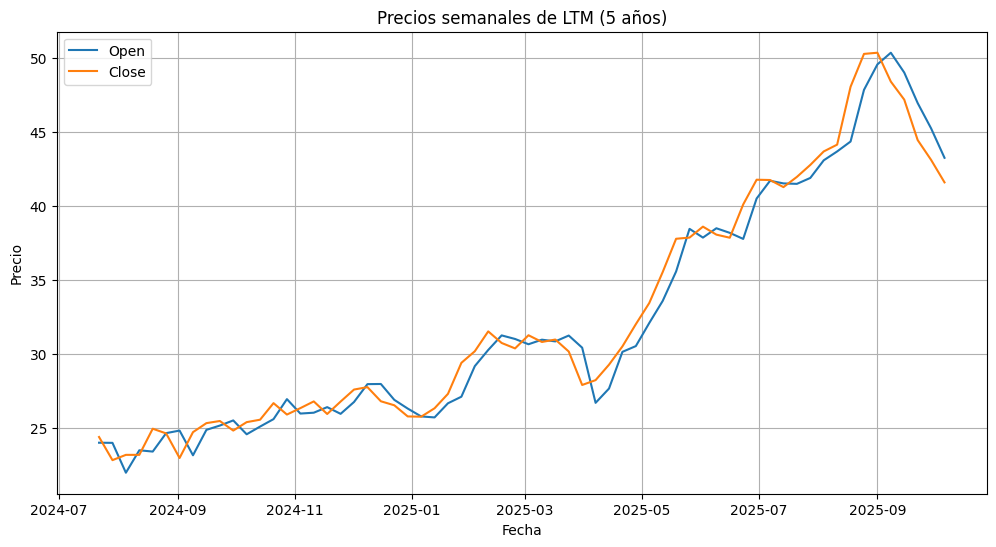

Variación semanal: -3.53%
Variación mensual: -14.07%
Variación anual  : 63.82%


In [20]:
# Selecciona el ticker que quieres analizar
ticker = tickers[3]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")

---
<div style="text-align: center;">
    <h2><strong>Banco de Chile</strong></h2>
    <h3>Ticker: BCH</h3>
</div>

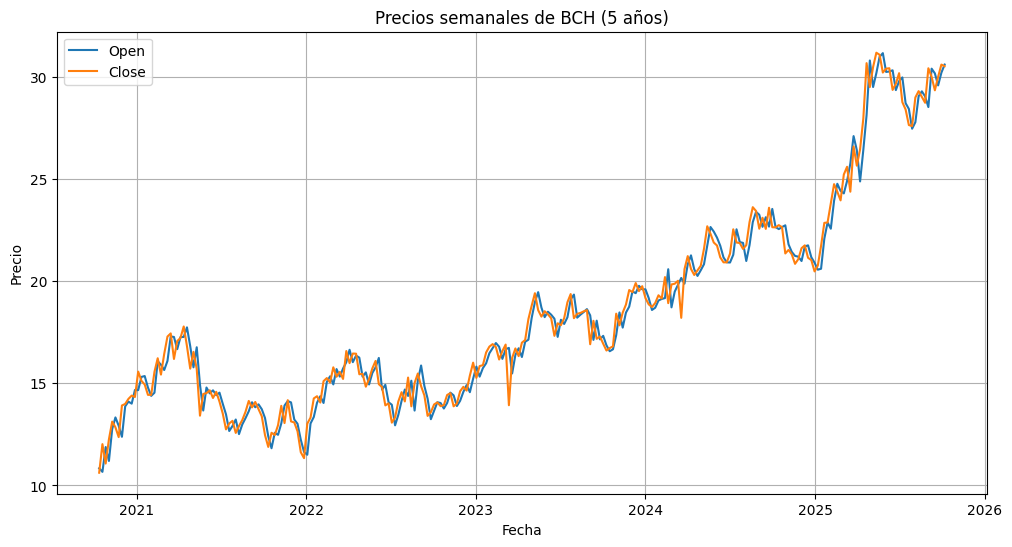

Variación semanal: -0.26%
Variación mensual: 1.73%
Variación anual  : 34.86%


In [21]:
# Selecciona el ticker que quieres analizar
ticker = tickers[4]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")

---
<div style="text-align: center;">
    <h2><strong>Apple</strong></h2>
    <h3>Ticker: AAPL</h3>
</div>

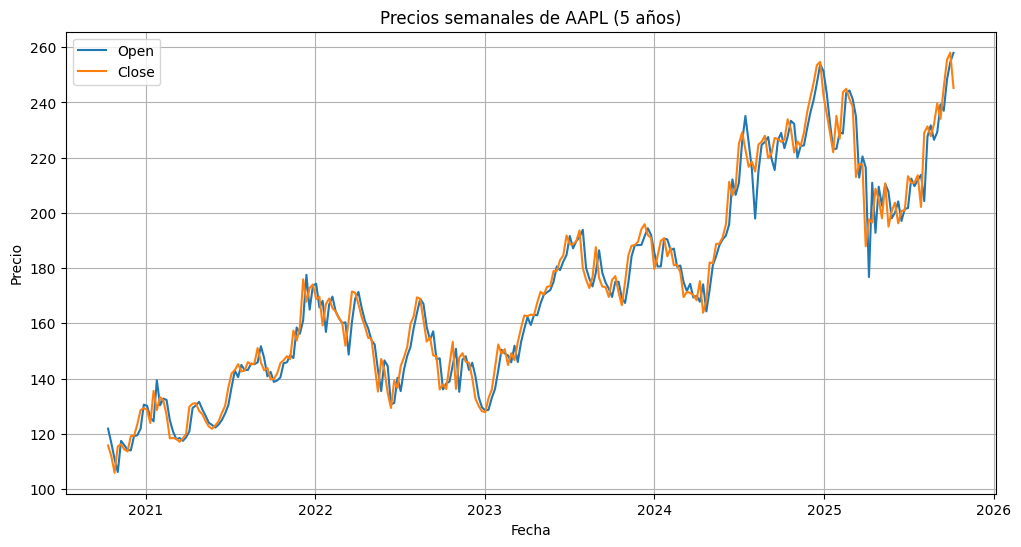

Variación semanal: -4.94%
Variación mensual: 4.78%
Variación anual  : 8.29%


In [22]:
# Selecciona el ticker que quieres analizar
ticker = tickers[5]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")

---
<div style="text-align: center;">
    <h2><strong>Gold Futures </strong></h2>
    <h3>Ticker: GC=F</h3>
</div>

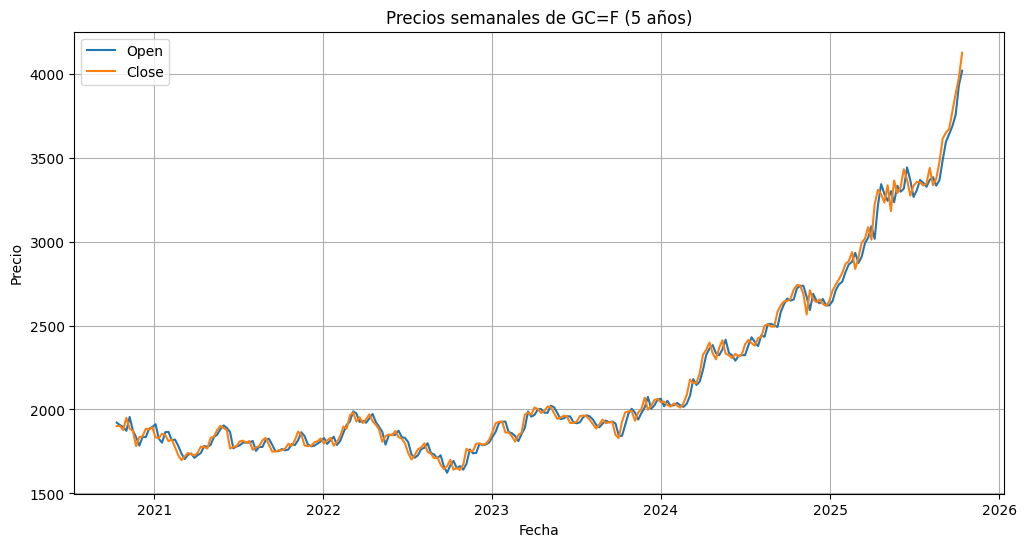

Variación semanal: 3.75%
Variación mensual: 12.35%
Variación anual  : 52.01%


In [23]:
# Selecciona el ticker que quieres analizar
ticker = tickers[6]  # Por ejemplo, el primero de la lista

# Si descargaste los datos en formato multi-index, selecciona el ticker así:
df_ticker = data.xs(ticker, axis=1, level=1)
df_ticker = df_ticker.dropna()
# Graficar precios de apertura y cierre
plt.figure(figsize=(12, 6))
plt.plot(df_ticker.index, df_ticker['Open'], label='Open')
plt.plot(df_ticker.index, df_ticker['Close'], label='Close')
plt.title(f'Precios semanales de {ticker} (5 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

# Calcular variaciones
# Variación semanal (última semana vs anterior)
var_semana = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-2])/df_ticker['Close'].iloc[-2] * 100
# Variación mensual (último vs hace 4 semanas)
var_mes = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-5])/df_ticker['Close'].iloc[-5] * 100
# Variación anual (último vs hace 52 semanas)
var_anio = (df_ticker['Close'].iloc[-1] - df_ticker['Close'].iloc[-53])/df_ticker['Close'].iloc[-53] * 100

print(f"Variación semanal: {var_semana:.2f}%")
print(f"Variación mensual: {var_mes:.2f}%")
print(f"Variación anual  : {var_anio:.2f}%")